# Fig S1 and S2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib as mpl
import sys
sys.path.append(r'/home/brandon/Documents/Code/low-mag-immune')
from low_mag_immune import compute_all_line_dists, compute_all_median_intens, compute_all_intens_stat


/home/brandon/anaconda3/envs/ome_zarr/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
#%matplotlib qt
%matplotlib inline

In [3]:
"""plot style"""
linewidth = 4
mpl.rc('axes', linewidth=linewidth)
mpl.rc('font', family='Arial')
fontsize = 24


colors = {'no_inj': [0.8, 0.8, 0.8],
         'mock': [0.4, 0.4, 0.4],
         'e.coli': [0, 0.4, 0],
         'complete': [0, 0.8, 0]}

def style_axes(ax, fontsize=24):
    plt.minorticks_off()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.xaxis.set_tick_params(labelsize=20)
    ax.yaxis.set_tick_params(labelsize=20)
    for tick in ax.xaxis.get_major_ticks():
        tick.label1.set_fontsize(fontsize)
    for tick in ax.yaxis.get_major_ticks():
        tick.label1.set_fontsize(fontsize)
    plt.tight_layout()
    
    return ax


## Injection site control

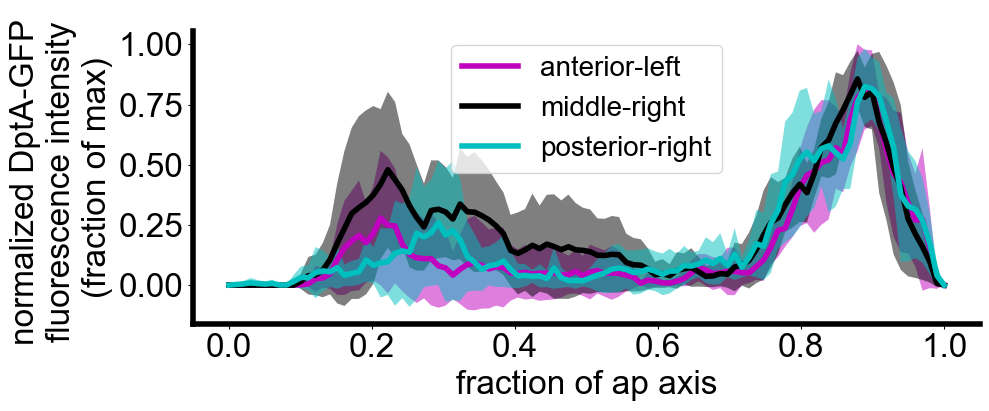

In [4]:
anterior_left_dir = [r'/media/brandon/Data1/Jazmin/AxioZoom/2023_10_26_drs-gfp_mcherry_inj_controls/exp10ms_power100_mag23.5x/anterior_left']
middle_right_dir = [r'/media/brandon/Data1/Jazmin/AxioZoom/2023_10_26_drs-gfp_mcherry_inj_controls/exp10ms_power100_mag23.5x/middle_right']
posterior_right_dir = [r'/media/brandon/Data1/Jazmin/AxioZoom/2023_10_26_drs-gfp_mcherry_inj_controls/exp10ms_power100_mag23.5x/posterior_right']


signal_thresh=None
larvae_thresh = 250

line_dists_ant = compute_all_line_dists(anterior_left_dir, larvae_thresh=larvae_thresh, signal_thresh=signal_thresh, short_axis=1)
line_dists_mid = compute_all_line_dists(middle_right_dir, larvae_thresh=larvae_thresh, signal_thresh=signal_thresh, short_axis=1)
line_dists_pos = compute_all_line_dists(posterior_right_dir, larvae_thresh=larvae_thresh, signal_thresh=signal_thresh, short_axis=1)



# plot mean and std of all on one plot
plt.figure(figsize=(10, 4))
all_dists = [line_dists_ant, line_dists_mid, line_dists_pos]
plot_colors = ['m', 'k', 'c']
labels = ['anterior-left', 'middle-right', 'posterior-right']
for i, ld in enumerate(all_dists):
    line_dist = ld.copy()
    bin_width = 1 / len(line_dist)
    for j in range(line_dist.shape[0]):
        #line_dist[j] = line_dist[j] / np.max(line_dist[j])
        line_dist[j] = line_dist[j] / np.max(line_dist[j])

    m = np.mean(line_dist, axis=0)
    s = np.std(line_dist, axis=0)
    l = m - s
    u = m + s
    plt.plot(np.linspace(0, 1, len(m)), m, '-', color=plot_colors[i], linewidth=4, label=labels[i])
    plt.fill_between(np.linspace(0, 1, len(m)), l, u, facecolor=plot_colors[i], alpha=0.5)

plt.xlabel('fraction of ap axis', fontsize=fontsize)
plt.ylabel('normalized DptA-GFP \nfluorescence intensity \n(fraction of max)', fontsize=fontsize)
plt.legend(fontsize=20)
ax = style_axes(plt.gca())



In [20]:
#plt.savefig(r'/home/brandon/Documents/Code/diptericin-paper/figures/Supplemental_Figures/preliminaries/injection_site_ap_dists_v2.pdf')

## Heterozygotes vs Homozygotes

In [8]:
homozygote_dir = [r'/media/brandon/Data1/Tiffany/AxioZoom/Experimental Data/2023_9_26_genecontrol_ecoli_mag23.5_10ms/24hrafterinj_dpt-gfp']
heterozygote_dir = [r'/media/brandon/Data1/Tiffany/AxioZoom/Experimental Data/2023_9_26_genecontrol_ecoli_mag23.5_10ms/24hrafterinj_U;G_Dpt_gfp']


signal_thresh=None
larvae_thresh = 250

line_dists_hom = compute_all_line_dists(homozygote_dir, larvae_thresh=larvae_thresh, signal_thresh=signal_thresh)
line_dists_het = compute_all_line_dists(heterozygote_dir, larvae_thresh=larvae_thresh, signal_thresh=signal_thresh)
line_dists_het = line_dists_het[np.arange(0, len(line_dists_het), 2)]

all_dists = [line_dists_het, line_dists_hom]
labels = ['heterozygote', 'homozygote']


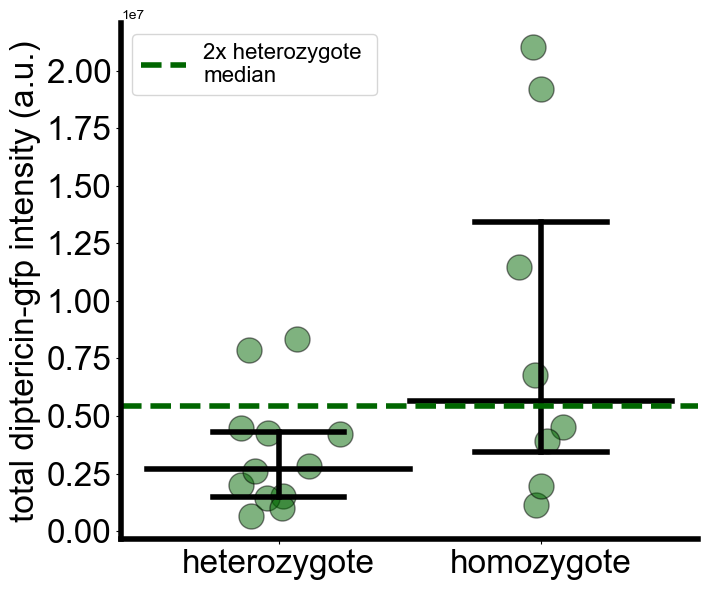

In [10]:
# plot dot plot of intensities
markersize=18
sig_x = 0.1
delta_x = 0.25
linewidth = 4
plt.figure(figsize=(7, 6))
for i, ld in enumerate(all_dists):
    total_intens = np.sum(ld, axis=1)
    plt.plot(i * np.ones_like(total_intens) + np.random.normal(scale=sig_x, size=len(total_intens)), 
             total_intens, 'ko', markersize=markersize, markerfacecolor=colors['e.coli'], alpha=0.5)  
    l, m, u = np.quantile(total_intens, q=(0.25, 0.5, 0.75))
    if i == 0:
        het_median = m
    plt.plot(np.linspace(i-delta_x, i+delta_x, 5), l * np.ones(5), 'k-', linewidth=linewidth, label='_nolabel_')
    plt.plot(np.linspace(i-2*delta_x, i+2*delta_x, 5), m * np.ones(5), 'k-', linewidth=linewidth, label='_nolabel_')
    plt.plot(np.linspace(i-delta_x, i+delta_x, 5), u * np.ones(5), 'k-', linewidth=linewidth, label='_nolabel_')
    plt.plot(i * np.ones(5), np.linspace(l, u, 5), 'k-', linewidth=linewidth, label='_nolabel_')


xline = np.linspace(-0.6, 1.6)
yline = 2 * het_median * np.ones_like(xline)
plt.plot(xline, yline, '--', color=colors['e.coli'], linewidth=4, label='2x heterozygote \nmedian')
plt.legend(fontsize=16)
plt.xticks([0, 1], labels=labels, fontsize=fontsize)
plt.xlim([-0.6, 1.6])
plt.ylabel('total diptericin-gfp intensity (a.u.)', fontsize=fontsize)
ax = style_axes(plt.gca())


In [11]:
"""bootstrap median estimates"""
n_bootstraps = 10000
total_intens = np.sum(line_dists_het, axis=1)
bootstrapped_medians = np.zeros(n_bootstraps)
for i in range(n_bootstraps):
    these_intens = np.random.choice(total_intens, len(total_intens))
    bootstrapped_medians[i] = np.median(these_intens)

bootstrapped_medians_het = bootstrapped_medians

total_intens = np.sum(line_dists_hom, axis=1)
bootstrapped_medians = np.zeros(n_bootstraps)
for i in range(n_bootstraps):
    these_intens = np.random.choice(total_intens, len(total_intens))
    bootstrapped_medians[i] = np.median(these_intens)

bootstrapped_medians_hom = bootstrapped_medians



In [12]:
print(f'het: {np.median(np.sum(line_dists_het, axis=1))} +/- {np.std(bootstrapped_medians_het)}')
print(f'hom: {np.median(np.sum(line_dists_hom, axis=1))} +/- {np.std(bootstrapped_medians_hom)}')

het: 2714653.2172900876 +/- 932425.306517466
hom: 5653220.700750176 +/- 3862351.526788114


In [49]:
#plt.savefig(r'/home/brandon/Documents/Code/diptericin-paper/figures/Supplemental_Figures/preliminaries/het_home_total_intens.pdf')

## Ether vs Ice

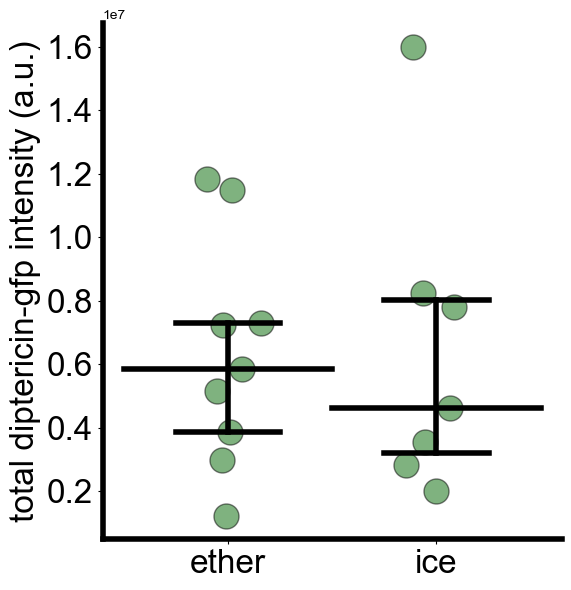

In [13]:
ether_dir = [r'/media/brandon/Data1/Tiffany/AxioZoom/Experimental Data/2023_9_15_dptgfp_ecoli_mag23.5/ecoli_ether_control']
ice_dir = [r'/media/brandon/Data1/Tiffany/AxioZoom/Experimental Data/2023_9_15_dptgfp_ecoli_mag23.5/ecoli_ice_control']


signal_thresh=None
larvae_thresh = 250

line_dists_ether = compute_all_line_dists(ether_dir, larvae_thresh=larvae_thresh, signal_thresh=signal_thresh)
line_dists_ice = compute_all_line_dists(ice_dir, larvae_thresh=larvae_thresh, signal_thresh=signal_thresh)


all_dists = [line_dists_ether, line_dists_ice]
plot_colors = [colors['e.coli'], colors['e.coli']]
labels = ['ether', 'ice']


# plot dot plot of intensities
markersize=18
sig_x = 0.1
delta_x = 0.25
linewidth = 4
plt.figure(figsize=(6, 6))
for i, ld in enumerate(all_dists):
    total_intens = np.sum(ld, axis=1)
    plt.plot(i * np.ones_like(total_intens) + np.random.normal(scale=sig_x, size=len(total_intens)), 
             total_intens, 'ko', markersize=markersize, markerfacecolor=plot_colors[i], alpha=0.5)  
    l, m, u = np.quantile(total_intens, q=(0.25, 0.5, 0.75))
    plt.plot(np.linspace(i-delta_x, i+delta_x, 5), l * np.ones(5), 'k-', linewidth=linewidth)
    plt.plot(np.linspace(i-2*delta_x, i+2*delta_x, 5), m * np.ones(5), 'k-', linewidth=linewidth)
    plt.plot(np.linspace(i-delta_x, i+delta_x, 5), u * np.ones(5), 'k-', linewidth=linewidth)
    plt.plot(i * np.ones(5), np.linspace(l, u, 5), 'k-', linewidth=linewidth)


plt.xticks([0, 1], labels=['ether', 'ice'], fontsize=fontsize)
plt.xlim([-0.6, 1.6])
plt.ylabel('total diptericin-gfp intensity (a.u.)', fontsize=fontsize)
ax = style_axes(plt.gca())




In [51]:
plt.savefig(r'/home/brandon/Documents/Code/diptericin-paper/figures/Supplemental_Figures/preliminaries/ether_ice_tot_intens.pdf')

## Dose response

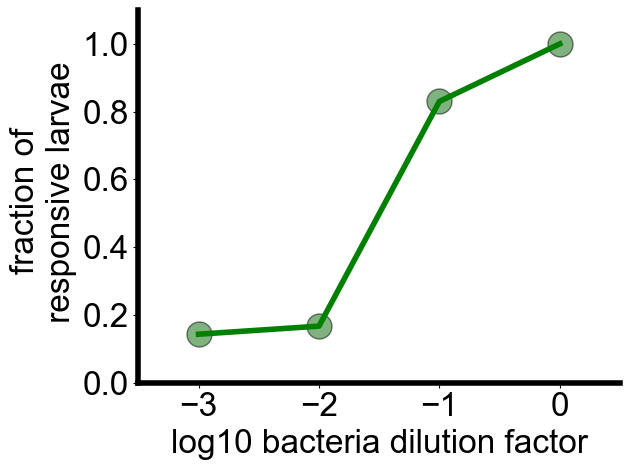

In [16]:
"""plot fraction of larvae responding manual"""
fraction_1 = 1.0
fraction_10 = 0.83
fraction_100 = 1/6
fraction_1000 = 1/7

dilutions = [1e0, 1e-1, 1e-2, 1e-3]
markerfacecolor = colors['e.coli']
alpha = 0.5
fractions = [fraction_1, fraction_10, fraction_100, fraction_1000]
plt.figure()
plt.plot(np.log10(dilutions), fractions, 'ko', markersize=markersize, markerfacecolor=markerfacecolor, alpha=alpha)
plt.plot(np.log10(dilutions), fractions, 'g-', linewidth=4)

    
plt.xlabel('log10 bacteria dilution factor', fontsize=fontsize)
# use complicated string finding to automatically extract the name of the stat computed

plt.ylabel('fraction of \n responsive larvae', fontsize=fontsize)
plt.xscale('linear')
plt.yscale('linear')
plt.xlim([-3.5, 0.5])
plt.ylim([0, 1.1])
ax = style_axes(plt.gca())

In [26]:
#plt.savefig(r'/home/brandon/Documents/Code/diptericin-paper/figures/Supplemental_Figures/preliminaries/fraction_responding_vs_dose.pdf')